### Import modules and DataFrame

In [2]:
import pandas as pd
import numpy
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfs = pickle.load(open('dfs_churn_marked.p'))

In [4]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182000 entries, 0 to 181999
Data columns (total 54 columns):
abtm        182000 non-null object
br          167826 non-null object
brn         140477 non-null object
brv         140477 non-null object
chn         182000 non-null object
ckey        182000 non-null object
co          182000 non-null object
coiso       182000 non-null object
ct          182000 non-null object
devm        140477 non-null object
devv        140477 non-null object
drt         56448 non-null object
eps         182000 non-null object
errmsg      2262 non-null object
gen         173329 non-null object
img         9289 non-null object
isp         182000 non-null object
lang        182000 non-null object
live        182000 non-null object
lrg         182000 non-null object
mplyevnt    41523 non-null object
mpv         182000 non-null object
mvcp        182000 non-null object
mvctg       182000 non-null object
mvid        182000 non-null object
mvrt        182000 n

### Categorical variables

In [5]:
unique_abtm = dfs['abtm'].unique() # A/B test mark
print len(unique_abtm)
print unique_abtm

1
[u'Release']


##### => Drop abtm

In [6]:
unique_br = dfs['br'].unique() # The bitrate of the media (kbps)
print len(unique_br)
print unique_br

19203
[u'3614101' u'3328416' u'3587620' ..., u'871378' u'2270765' u'2252671']


In [7]:
unique_brn = dfs['brn'].unique() # Browser name
print len(unique_brn)
print unique_brn

3
[u'KOOLi_Player' u'KOOLi_Humax_Player' nan]


In [8]:
unique_brv = dfs['brv'].unique() # Browser version
print len(unique_brv)
print unique_brv

9
[u'1.0.10' u'2.0.6' u'1.0.4' u'' nan u'2.0.7' u'1.0.7' u'2.0.4' u'1.0.11']


In [9]:
unique_chn = dfs['chn'].unique() # Live channel name
print len(unique_chn)
print unique_chn

33
[u'' u'CH.3 Gayo TV' u'CH.1 Yonhap News TV ' u'CH.16 CTS' u'CH.12 Edge TV'
 u'CH.14 The Movie' u'CH.17 FTV' u'CH.13 K-Baduk' u'CH.18 Mountain TV'
 u'CH.21 ONT' u'CH.26 GTV' u'CH.20 CBS' u'CH.28 Arirang TV' u'CH.31 CHING'
 u'CH.8 KBN TV' u'CH.15 Daekyo Kids TV' u'CH.10 Healthmedi TV' u'CH.33 ETN'
 u'CH.11 Runway TV' u'CH.23 Polaris TV' u'CH.22 Telenovela'
 u'CH.19 Channel China' u'CH.25 Food TV' u'CH.9 NTV' u'CH.34 KIDS-TV'
 u'CH.32 OBS W' u'CH.29 Arte TV' u'CH.7 Event TV' u'CH.24 Silver-i TV'
 u'CH.35 Jungchul TV' u'CH.27 Jei English' u'CH.30 BBS'
 u'CH.5 Asia Business News TV']


In [10]:
unique_co = dfs['co'].unique() # Contry name
print len(unique_co)
print unique_co

10
[u'Canada' u'United States' u'Republic of Korea' u'Guam' u'United Kingdom'
 u'Mexico' u'Vietnam' u'China' u'Singapore' u'Japan']


In [11]:
unique_coiso = dfs['coiso'].unique() # Country ISO Code
print len(unique_coiso)
print unique_coiso

10
[u'CA' u'US' u'KR' u'GU' u'GB' u'MX' u'VN' u'CN' u'SG' u'JP']


##### => Drop coiso 

In [12]:
unique_ct = dfs['ct'].unique() # City name
print len(unique_ct)
print unique_ct

1058
[u'Coquitlam' u'Los Angeles' u'Laguna Woods' ..., u'Spanaway'
 u'Charlestown' u'New Hyde Park']


In [13]:
unique_devm = dfs['devm'].unique() # device model name
print len(unique_devm)
print unique_devm

4
[u'WooriKooli W' u'h3' nan u'H5A2CUDQOT']


In [14]:
unique_devv = dfs['devv'].unique() # device vendor
print len(unique_devv)
print unique_devv

4
[u'Hutek' u'humaxdigital' nan u'Humaxdigital']


In [15]:
unique_eps = dfs['eps'].unique() # Episode name
print len(unique_eps)
print unique_eps

8093
[u"E71 : I'm Sorry Gangnamgu" u'E106 : Always Spring Day'
 u'E1133 : Open Concert' ..., u'E26 : You Are Gift' u'E306 : Running Man'
 u'E29 : Beautiful You']


In [16]:
unique_errmsg = dfs['errmsg'].unique() # Error message string
print len(unique_errmsg)
print unique_errmsg

246
[ u'com.google.android.exoplayer.audio.AudioTrack$InitializationException: AudioTrack init failed: 0, Config(44100, 12, 44100)'
 u'Unexpected IllegalStateException: null'
 u'java.net.SocketTimeoutException' nan
 u'Unable to connect to http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/sbs/20170401/6439023/video_und_2/19440000000.m4s'
 u'Unable to connect to http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/tvn/20170403/6439822/audio_und_1/9120107483.m4s'
 u'com.google.android.exoplayer.upstream.HttpDataSource$HttpDataSourceException: Unable to connect to http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/tvn/20170403/6439822/video_und_2/9120000000.m4s'
 u'Unable to connect to http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/tvn/20170403/6439822/6439822.mpd'
 u'Unable to connect to http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/sbs/20170402/6439609/video_und_5/2640000000.m4s'
 u'Unable to connect to http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/sbs/20170402/6439649/video_und_4/0.m4s

In [17]:
unique_gen = dfs['gen'].unique() # Gender
print len(unique_gen)
print unique_gen

2
[u'Unset' nan]


##### => Drop gen

In [18]:
unique_img = dfs['img'].unique() # Movie Thumbnail Image URL
print len(unique_img)
print unique_img

3073
[u'https://d1ijxi6ljrlc3i.cloudfront.net/5i7bozhpqk0fva6sxqrk'
 u'https://d1ijxi6ljrlc3i.cloudfront.net/hik9csyxhv60jhn7rgw9'
 u'https://d1ijxi6ljrlc3i.cloudfront.net/dedlbb7aygwme6zauxca' ...,
 u'https://d1ijxi6ljrlc3i.cloudfront.net/t0g9zajuyrxwgvax2t16'
 u'https://d1ijxi6ljrlc3i.cloudfront.net/tl23ima4g2qxnwwn6oxw'
 u'https://d1ijxi6ljrlc3i.cloudfront.net/h75urvro9zaa2ayjfslc']


In [19]:
unique_isp = dfs['isp'].unique() # ISP name
print len(unique_isp)
print unique_isp

114
[u'Pro Omnis Telecommunication' u'Time Warner Cable'
 u'West Coast Internet Incorporated' u'Comcast Cable' u'Verizon Fios'
 u'Frontier Communications Corporation' u'CenturyLink'
 u'AT&T Internet Services' u'AT&T U-verse' u'PenTeleData'
 u'Charter Communications' u'Verizon Internet Services'
 u'Cox Communications' u'Frontier Communications' u'Optimum Online'
 u'Sprint PCS' u'WideOpenWest' u'Grande Communications' u'Hawaiian Telcom'
 u'Cascadelink' u'AT&T Services' u'Telus Communications' u'Sumofiber'
 u'EarthLink' u'Windstream Communications' u'Millennium Telcom LLC'
 u'Braintree Electric Light Dept.' u'MetroCast' u'Bell Canada'
 u'Shaw Communications' u'Rogers Cable' u'Wildblue Communications'
 u'Sonic.net' u'Cogent Communications'
 u'Clarksville Department Of Electricity' u'Consolidated Communications'
 u'Hughes Network Systems' u'Full Channel' u'Bel Air Internet, LLC'
 u'Bell Aliant' u'ANS Communications' u'Fairpoint Communications'
 u'Atlantic Broadband' u'Level 3 Communications

In [20]:
unique_lang = dfs['lang'].unique() # Language
print len(unique_lang)
print unique_lang

2
[u'ko' u'en']


In [21]:
unique_live = dfs['live'].unique() # live stream ('t') or not ('f')
print len(unique_live)
print unique_live

2
[u'f' u't']


In [22]:
unique_mplyevnt = dfs['mplyevnt'].unique() # Player event type
print len(unique_mplyevnt)
print unique_mplyevnt

9
[u'iBufStart' u'brchg' u'compl' u'bufStart' u'stop' u'play' u'firstPlay'
 u'pause' nan]


In [23]:
unique_mpv = dfs['mpv'].unique() # Media player version
print len(unique_mpv)
print unique_mpv

8
[u'KOOLi_Player 1.0.10' u'KOOLi_Player 2.0.6' u'KOOLi_Player 1.0.4'
 u'KOOLi_Player ' u'KOOLi_Player 2.0.7' u'KOOLi_Player 1.0.7'
 u'KOOLi_Player 2.0.4' u'KOOLi_Player 1.0.11']


In [24]:
unique_mvcp = dfs['mvcp'].unique() # Movie contents provider (abc, ...)
print len(unique_mvcp)
print unique_mvcp

1
[u'Unset']


##### => Drop mvcp

In [25]:
unique_mvctg = dfs['mvctg'].unique() # Movie category (drama, ...)
print len(unique_mvctg)
print unique_mvctg

8
[u'Drama' u'Variety' u'Kids' u'News' u'Life' u'Movies' u'Live' u'LiveTV']


In [26]:
unique_mvid = dfs['mvid'].unique() # Movie ID
print len(unique_mvid)
print unique_mvid

8124
[u"E71 : I'm Sorry Gangnamgu" u'E106 : Always Spring Day'
 u'E1133 : Open Concert' ..., u'E26 : You Are Gift' u'E306 : Running Man'
 u'E29 : Beautiful You']


In [27]:
unique_mvrt = dfs['mvrt'].unique() # Movie rate(pg, r, or ...)
print len(unique_mvrt)
print unique_mvrt

1
[u'Unset']


##### => Drop mvrt

In [28]:
unique_mvsctg = dfs['mvsctg'].unique() # Movie sub-category(romantic,..)
print len(unique_mvsctg)
print unique_mvsctg

1
[u'Unset']


##### => Drop mvsctg

In [29]:
unique_osn = dfs['osn'].unique() # OS name
print len(unique_osn)
print unique_osn

2
[u'Android' nan]


In [30]:
unique_osv = dfs['osv'].unique() # OS version
print len(unique_osv)
print unique_osv

3
[u'4.4.4' u'4.4.2' nan]


In [31]:
unique_pltn = dfs['pltn'].unique() # Platform name
print len(unique_pltn)
print unique_pltn

3
[u'WooriKooli W' u'h3' u'H5A2CUDQOT']


In [32]:
unique_ppv = dfs['ppv'].unique() # Player Platform Version
print len(unique_ppv)
print unique_ppv

2
[u'Exoplayer:r1.4.2' u'Android Player']


In [33]:
unique_res = dfs['res'].unique() # Display resolutions
print len(unique_res)
print unique_res

2
[u'1080p' nan]


In [34]:
unique_rg = dfs['rg'].unique() # Region Name (State of province)
print len(unique_rg)
print unique_rg

65
[u'British Columbia' u'California' u'Massachusetts' u'New York' u'Ontario'
 u'New Jersey' u'Colorado' u'Illinois' u'Georgia' u'Pennsylvania'
 u'unknown' u'North Carolina' u'Maryland' u'Texas' u'Alabama'
 u'Connecticut' u'Virginia' u'Michigan' u'Florida' u'Washington' u'Nevada'
 u'Indiana' u'District of Columbia' u'Arizona' u'Hawaii' u'Arkansas'
 u'Utah' u'Wisconsin' u'Louisiana' u'New Mexico' u'Minnesota' u'Delaware'
 u'Tennessee' u'Kansas' u'Ohio' u'Oklahoma' u'Oregon' u'Rhode Island'
 u'Kentucky' u'New Hampshire' u'Missouri' u'Hagatna' u'Surrey' u'Alaska'
 u'Alberta' u'Estado de Baja California' u'South Carolina'
 u'Thanh Pho Ha Noi' u'Montana' u'Jalisco' u'Jiangxi Sheng' u'Vermont'
 u'Seoul' u'Mississippi' u'Ulsan' u'Idaho' u'England' u'Tamuning'
 u'Barrigada' u'Quebec' u'Guangdong' u'Okinawa' u'Wyoming' u'Mexico City'
 u'Estado de Mexico']


In [35]:
unique_rgiso = dfs['rgiso'].unique() # Region ISO Code
print len(unique_rgiso)
print unique_rgiso

62
[u'BC' u'CA' u'MA' u'NY' u'ON' u'NJ' u'CO' u'IL' u'GA' u'PA' u'unknown'
 u'NC' u'MD' u'TX' u'AL' u'CT' u'VA' u'MI' u'FL' u'WA' u'NV' u'IN' u'DC'
 u'AZ' u'HI' u'AR' u'UT' u'WI' u'LA' u'NM' u'MN' u'DE' u'TN' u'KS' u'OH'
 u'OK' u'OR' u'RI' u'KY' u'NH' u'MO' u'SRY' u'AK' u'AB' u'BCN' u'SC' u'64'
 u'MT' u'JAL' u'36' u'VT' u'11' u'MS' u'31' u'ID' u'ENG' u'QC' u'44' u'47'
 u'WY' u'DIF' u'MEX']


In [36]:
unique_sid = dfs['sid'].unique() # Web server session ID
print len(unique_sid)
print unique_sid

3
[u'Wooli_KOOLi' u'KOOLi_Humax' u'KOOLi_Humax_Live']


In [37]:
unique_spos = dfs['spos'].unique() # Symbolic Position
print len(unique_spos)
print unique_spos

159
[u'V0009' u'V0034' u'V0058' u'V0000' u'V0022' u'V0061' u'V0039' u'V0006'
 u'V0038' u'V0013' u'V0068' u'V0037' u'V0066' u'V0093' u'V0004' u'V0064'
 u'V0062' u'V0008' u'V0059' u'V0032' u'V0023' u'V0029' u'V0055' u'V0076'
 u'V0053' u'V0015' u'V0011' u'V0045' u'V0054' u'V0041' u'V0003' u'V0001'
 u'V0043' u'V0073' u'V0050' u'V0074' u'V0007' u'V0063' u'V0047' u'V0048'
 u'V0020' u'V0035' u'V0033' u'V0040' u'V0052' u'V0016' u'V0017' u'V0046'
 u'V0075' u'V0031' u'V0049' u'V0026' u'V0065' u'V0014' u'V0084' u'V0081'
 u'V0069' u'V0077' u'V0060' u'V0024' u'V0056' u'L2357' u'V0036' u'V0028'
 u'V0025' u'V0010' u'V0018' u'V0070' u'V0051' u'V0012' u'V0030' u'V0021'
 u'V0027' u'V0019' u'V0005' u'V0071' u'V0099' u'V0078' u'V0085' u'V0002'
 u'V0079' u'V0044' u'V0080' u'V0083' u'V0057' u'V0042' u'V0088' u'V0082'
 u'V0098' nan u'L2353' u'V0067' u'V0092' u'V0090' u'V0072' u'L2354'
 u'V0097' u'V0091' u'V0094' u'V0101' u'V0118' u'L2355' u'V0116' u'L2356'
 u'V0122' u'V0087' u'V0121' u'V0104' u'V0103' u'V011

In [38]:
unique_srn = dfs['srn'].unique() # Series name
print len(unique_srn)
print unique_srn

470
[u'\uc544\uc784\uc3d8\ub9ac \uac15\ub0a8\uad6c'
 u'\uc5b8\uc81c\ub098 \ubd04\ub0a0' u'\uc5f4\ub9b0\uc74c\uc545\ud68c'
 u'\ud798\uc388\uc5ec\uc790 \ub3c4\ubd09\uc21c'
 u'\uc751\ub2f5\ud558\ub77c 1988' u'Tunnel' u'\uae40\uacfc\uc7a5'
 u'\uc625\uc911\ud654' u'\ubfcc\ub9ac\uae4a\uc740 \ub098\ubb34'
 u'\uac11\ub3d9\uc774 '
 u'\uc5b8\ub2c8\ub4e4\uc758 \uc2ac\ub7a8\ub369\ud06c 2'
 u'\uc2a4\ud0c0 \ubd80\ubd80\uc1fc \uc790\uae30\uc57c -  \ubc31\ub144\uc190\ub2d8'
 u'\uc544\ubc84\uc9c0\uac00 \uc774\uc0c1\ud574'
 u'\ud799\ud569\uc758 \ubbfc\uc871 '
 u'\ub2e4\uc2dc \uc4f0\ub294 \uc721\uc544\uc77c\uae30! \ubbf8\uc6b4 \uc6b0\ub9ac \uc0c8\ub07c'
 u'\ub0b4 \ub9c8\uc74c\uc758 \uaf43\ube44'
 u'\uacf5\uc8fc\uc758 \ub0a8\uc790' u'\ud130\ub2dd\uba54\uce74\ub4dc W'
 u'\ub2f9\uc2e0\uc740 \ub108\ubb34\ud569\ub2c8\ub2e4'
 u'\uadf8\uac83\uc774 \uc54c\uace0\uc2f6\ub2e4' u'JTBC \ub274\uc2a4\ub8f8'
 u'America News' u'\uadd3\uc18d\ub9d0' u'\uc778\uac04\uadf9\uc7a5'
 u'\uc544\ubc84\ub2d8 \uc81c\uac00 \ubaa8\uc2e

In [39]:
unique_ssid = dfs['ssid'].unique() # Session ID
print len(unique_ssid)
print unique_ssid

58827
[u'be86c466-c943-4f35-86f0-e7dbe678def0'
 u'894819a2-ca4a-47d9-9e5c-6bd2ce54277e'
 u'e7f78970-b677-4655-a98d-00c5dcb4f6b0' ...,
 u'd40dd732-410e-41d5-b00c-2754baf6f888'
 u'0cb44f77-32e3-42a8-a0bc-3050d3914af3'
 u'f1413822-6e57-4804-b43e-b34c3915c955']


In [40]:
unique_stype = dfs['stype'].unique() # Service Type(TV, Radio or ...)
print len(unique_stype)
print unique_stype

1
[u'Unset']


##### => Drop stype

In [41]:
unique_svr = dfs['svr'].unique() # Server name or Server URL
print len(unique_svr)
print unique_svr

8351
[ u'http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/sbs/20170331/6437020/6437020.mpd'
 u'http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/mbc/20170330/6435628/6435628.mpd'
 u'http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/kbs1/20170101/6345142/6345142.mpd'
 ...,
 u'http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/sbs/20160718/6199250/6199250.mpd'
 u'http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/sbs/20160703/6187275/6187275.mpd'
 u'http://kooli-cdn.wecandeo.com/kooli.wecandeo.com/mbc/20151221/5982763/5982763.mpd']


In [42]:
unique_szrid = dfs['szrid'].unique() # Streamlyzer Unique ID
print len(unique_szrid)
print unique_szrid

4359
[u'57d80ee3-4563-40c1-a64d-15a66c60edba'
 u'dc742456-10a3-48a5-9d4d-d8e8b220b069'
 u'95af6832-5e9d-4b07-91c3-7ef5a863e014' ...,
 u'dbf16e99-9605-4d1f-8632-ed801bde0071'
 u'3be6678b-c8a2-4cf0-a06b-626676604511'
 u'08aa70bf-6ca4-4482-b0ea-38a1be2ac5c1']


In [43]:
unique_type = dfs['type'].unique() # log type
print len(unique_type)
print unique_type

8
[u'vh' u'lBuf' u'mplyevent' u'iBuf' u'upImg' u'errmsg' u'plyRdy' u'Buf']


In [44]:
unique_uid = dfs['uid'].unique() # User id
print len(unique_uid)
print unique_uid

4197
[u'WUCH155103440' u'14110963601665' u'WUCH155102826' ..., u'14110963600867'
 u'14110963601000' u'14110963601007']


In [45]:
unique_utype = dfs['utype'].unique() # User type
print len(unique_utype)
print unique_utype

1
[u'user']


##### => Drop utype

In [46]:
unique_v = dfs['v'].unique() # Client API version
print len(unique_v)
print unique_v

1
[u'0.9.1']


##### => Drop v

In [47]:
unique_yob = dfs['yob'].unique() # Year of birth
print len(unique_yob)
print unique_yob

2
[u'Unset' nan]


### Now, drop them

In [48]:
def dropping_col(dfs, col_name):
    if col_name in dfs.columns:
        dfs = dfs.drop(col_name, axis = 1)
    return dfs

drop_col_lst = ['abtm','coiso','gen','mvcp','mvrt','mvsctg','stype','utype','v']
for col in drop_col_lst:
    dfs = dropping_col(dfs,col)

In [49]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182000 entries, 0 to 181999
Data columns (total 45 columns):
br          167826 non-null object
brn         140477 non-null object
brv         140477 non-null object
chn         182000 non-null object
ckey        182000 non-null object
co          182000 non-null object
ct          182000 non-null object
devm        140477 non-null object
devv        140477 non-null object
drt         56448 non-null object
eps         182000 non-null object
errmsg      2262 non-null object
img         9289 non-null object
isp         182000 non-null object
lang        182000 non-null object
live        182000 non-null object
lrg         182000 non-null object
mplyevnt    41523 non-null object
mpv         182000 non-null object
mvctg       182000 non-null object
mvid        182000 non-null object
osn         140477 non-null object
osv         140477 non-null object
pltn        182000 non-null object
ppv         182000 non-null object
res         167826 n

### Continuous variables

In [50]:
dfs['drt'] = dfs['drt'].fillna(0).astype(int)

In [51]:
### set index
#dfs.set_index('ts2', inplace=True) 

In [52]:
dfs.head()

,br,brn,brv,chn,ckey,co,ct,devm,devv,drt,...,tIBuf,tLBuf,tPld,tVH,tid,ts2,type,uid,yob,churn
0,3614101,KOOLi_Player,1.0.10,,17943e6c6eec49cdb6,Canada,Coquitlam,WooriKooli W,Hutek,2234000,...,6,5003,49377,59880,4e7475b2-0b88-461f-9387-0a9b77251df8,2017-03-31 23:56:07.535,vh,WUCH155103440,Unset,False
1,3328416,KOOLi_Player,2.0.6,,17943e6c6eec49cdb6,United States,Los Angeles,h3,humaxdigital,5974000,...,6,5003,72154,36047,7e588404-453f-4a45-a8aa-05b6b0ae5be4,2017-03-31 23:57:12.602,lBuf,14110963601665,Unset,False
2,3587620,KOOLi_Player,1.0.10,,17943e6c6eec49cdb6,United States,Laguna Woods,WooriKooli W,Hutek,3490000,...,6,5003,69839,12022,f19a8414-64cd-418a-985e-61ae073d8915,2017-03-31 23:56:57.448,lBuf,WUCH155102826,Unset,True
3,1373174,KOOLi_Player,1.0.10,,17943e6c6eec49cdb6,United States,West Springfield,WooriKooli W,Hutek,3878000,...,6,5003,73567,39988,7efccc8b-436d-40bf-8bd5-fe45d08039ca,2017-03-31 23:55:47.792,mplyevent,WUCH161600388,Unset,False
4,1322244,KOOLi_Player,1.0.10,,17943e6c6eec49cdb6,United States,Medfield,WooriKooli W,Hutek,3738000,...,7,5004,70656,16127,14bd5375-4a03-460c-b0aa-d73fe16628b7,2017-03-31 23:54:27.751,vh,WUCH155101681,Unset,False


In [53]:
continuous_var = ['drt','tBuf','tIBuf','tLBuf','tPld','tVH']

In [54]:
def get_hist_and_count(var_name):
    var_name = dfs[var_name].fillna(0).astype(int)
    print 'number of 0s: ',len(var_name[var_name==0])
    print 'number of non 0s: ',len(var_name[var_name!=0])
    var_name.hist(bins=100)

number of 0s:  133855
number of non 0s:  48145


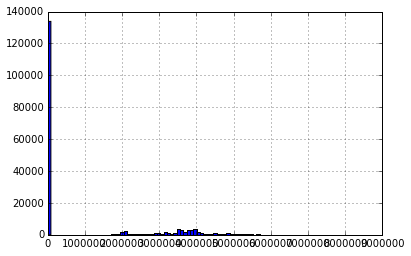

In [55]:
# duration of content in ms unit.
get_hist_and_count('drt')

In [56]:
#get_hist_wo_NaNs('drt')

number of 0s:  173316
number of non 0s:  8684


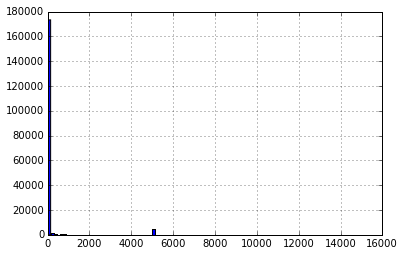

In [57]:
# Re-Buffering Time
get_hist_and_count('tBuf')

number of 0s:  179421
number of non 0s:  2579


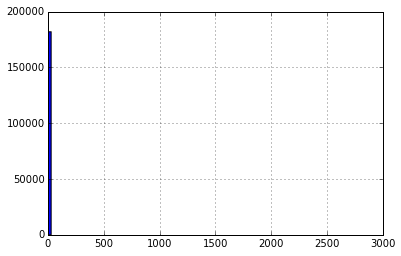

In [58]:
# Initial Buffering Time
get_hist_and_count('tIBuf')

In [59]:
#get_hist_wo_NaNs('tIBuf')

number of 0s:  179076
number of non 0s:  2924


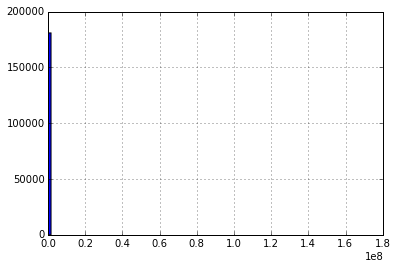

In [60]:
# Player Loading Time
get_hist_and_count('tPld')

number of 0s:  125552
number of non 0s:  56448


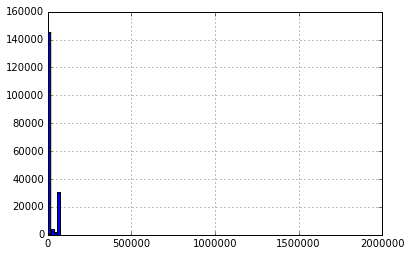

In [61]:
# Viewing Time
get_hist_and_count('tVH')

number of 0s:  120829
number of non 0s:  61171


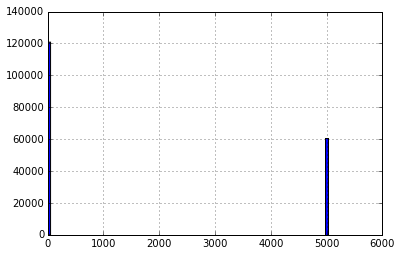

In [62]:
# Long Buffering Time
get_hist_and_count('tLBuf')

### TODO list.
    (Individual feature)
    1. Histogram with only "nonzeros" for continous variables
    
    (relationship between features)
    2. Scatter plot (all variables)
    3. Correlation between continours variables
    4. visualize each log type data 
    
    (CV for model training)
    5. Split train / test set